## Resetting GPU/Memory/..

In [0]:
# !kill -9 -1 # takes about a min

## GPU check

In [0]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " I Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

## To upload file to the notebook

In [0]:
# uploaded = files.upload()

!pip install -U -q PyDrive ## you will have install for every colab session
!pip install progressbar
!pip install opencv-python
!pip install numpy
!pip install pydot

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import files
import numpy as np

#https://drive.google.com/open?id=18s2csIhg8zujQxOntQlqYDUlQ40fNDoG

# 1. Authenticate and create the PyDrive client.

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
  
data_import = drive.CreateFile({'id':'18s2csIhg8zujQxOntQlqYDUlQ40fNDoG'})

print data_import

data = data_import.GetContentFile('data.zip')

print data

#Extracting data

In [0]:
import zipfile
import os

data_zip = 'data.zip'
data_dir = '../data/'

zip_ref = zipfile.ZipFile(data_zip, 'r')

if not os.path.exists(data_dir):
  os.makedirs(data_dir)
  print 'Extracting ...'
  zip_ref.extractall(data_dir)
  print 'Finished ...'
else:
  print 'Already extracted please check again.'
  
zip_ref.close()

# Data preview

In [0]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

def get_random_image_filename():
  image_files = os.listdir(data_dir)
  image_index = random.randint(0, len(image_files))
  filename = data_dir + image_files[image_index]
  
  return filename

def get_all_image_filename():
  all_files = os.listdir(data_dir)
  
  image_files = []
  for index in range(len(all_files)):
    if (all_files[index].endswith('.jpg')):
      image_files.append(all_files[index])
    
  filenames = [data_dir+fn for fn in image_files]

  return filenames

image = mpimg.imread(get_random_image_filename())
plt.axis('off')
plt.imshow(image)

# Get data

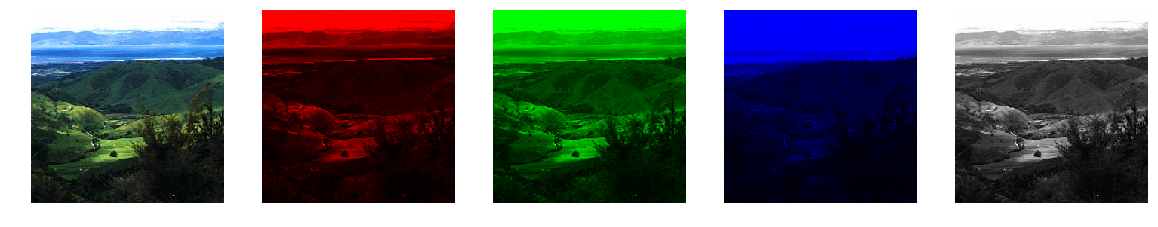

[50.] [96.] [132.] [86.]


In [124]:
import random
def get_data(filename):
  image = mpimg.imread(filename)
  rgb_channels = image.copy()
  red_channel = rgb_channels[:,:,0]
  green_channel = rgb_channels[:,:,1]
  blue_channel = rgb_channels[:,:,2]
  gray = cv2.imread(filename, 0)

  return image, red_channel, green_channel, blue_channel, gray

def get_data_as_batch(batch_size = 100):
  files = get_all_image_filename()
  files_batch = random.sample(files, batch_size)
  image_fname_batch, red_channel_batch, green_channel_batch, blue_channel_batch, gray_channel_batch = [], [], [], [], []
  
  for fname in files_batch:
    image, red_channel, green_channel, blue_channel, gray_channel = get_data(fname)
    image_fname_batch.append(fname)
    red_channel_batch.append(red_channel)
    green_channel_batch.append(green_channel)
    blue_channel_batch.append(blue_channel)
    gray_channel_batch.append(gray_channel)
    
  red_channel_batch = np.asarray(red_channel_batch, dtype = np.float32)
  green_channel_batch = np.asarray(green_channel_batch, dtype = np.float32)
  blue_channel_batch = np.asarray(blue_channel_batch, dtype = np.float32)
  gray_channel_batch = np.asarray(gray_channel_batch, dtype = np.float32)
  
  red_channel_batch = np.reshape(red_channel_batch, (batch_size, 256,256,1))
  green_channel_batch = np.reshape(green_channel_batch, (batch_size, 256,256,1))
  blue_channel_batch = np.reshape(blue_channel_batch, (batch_size, 256,256,1))
  gray_channel_batch = np.reshape(gray_channel_batch, (batch_size, 256,256,1))
  
#   red_channel_batch = np.divide(red_channel_batch, 255)
#   green_channel_batch = np.divide(green_channel_batch, 255)
#   blue_channel_batch = np.divide(blue_channel_batch, 255)
#   gray_channel_batch = np.divide(gray_channel_batch, 255)
  
  return image_fname_batch, red_channel_batch, green_channel_batch, blue_channel_batch, gray_channel_batch

def show_img_rgb_gray(fname, r, g, b, gray):
  i = mpimg.imread(fname)
  fig = plt.figure(figsize=(20, 20))
  rows = 1
  columns = 5
  fig.add_subplot(rows, columns,1)
  plt.imshow(i)
  plt.axis('off')
  fig.add_subplot(rows, columns,2)
  red = i.copy()
  red[:,:,0] = r
  red[:,:,1] = 0
  red[:,:,2] = 0
  plt.imshow(red)
  plt.axis('off')
  fig.add_subplot(rows, columns,3)
  green = i.copy()
  green[:,:,1] = g
  green[:,:,0] = 0
  green[:,:,2] = 0
  plt.imshow(red)
  plt.imshow(green)
  plt.axis('off')
  fig.add_subplot(rows, columns,4)
  blue = i.copy()
  blue[:,:,2] = b
  blue[:,:,1] = 0
  blue[:,:,0] = 0
  plt.imshow(blue)
  plt.axis('off')
  fig.add_subplot(rows, columns,5)
  plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
  plt.axis('off')
  plt.show()
  
def show_result(fname, r, g, b, gray, result):
  i = mpimg.imread(fname)
  res = mpimg.imread(fname).copy()
  res[:,:,0] = np.reshape(result[0], (h_dim, w_dim))
  res[:,:,1] = np.reshape(result[1], (h_dim, w_dim))
  res[:,:,2] = np.reshape(result[2], (h_dim, w_dim))
  print r[0][:3], g[0][:3], b[0][:3], gray[0][:3], i[0][0:3], res[0][0:3]
  fig = plt.figure(figsize=(10, 10))
  fig.subplots_adjust(wspace=0, hspace=0)
  rows = 1
  columns = 6
  fig.add_subplot(rows, columns,1)
  plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
  plt.axis('off')
  fig.add_subplot(rows, columns,2)
  plt.imshow(i)
  plt.axis('off')
  fig.add_subplot(rows, columns,3)
  plt.imshow(res)
  plt.axis('off')
  fig.add_subplot(rows, columns,4)
  red = i.copy()
  red[:,:,0] = r
  red[:,:,1] = 0
  red[:,:,2] = 0
  plt.imshow(red)
  plt.axis('off')
  fig.add_subplot(rows, columns,5)
  green = i.copy()
  green[:,:,1] = g
  green[:,:,0] = 0
  green[:,:,2] = 0
  plt.imshow(red)
  plt.imshow(green)
  plt.axis('off')
  fig.add_subplot(rows, columns,6)
  blue = i.copy()
  blue[:,:,2] = b
  blue[:,:,1] = 0
  blue[:,:,0] = 0
  plt.imshow(blue)
  plt.axis('off')

  plt.show()
  
def save_prediction(fname, r, g, b, gray, result):
  i = mpimg.imread(fname)
  res = mpimg.imread(fname).copy()
  res[:,:,0] = np.reshape(result[0], (h_dim, w_dim))
  res[:,:,1] = np.reshape(result[1], (h_dim, w_dim))
  res[:,:,2] = np.reshape(result[2], (h_dim, w_dim))
  print r[0][:3], g[0][:3], b[0][:3], gray[0][:3], i[0][0:3], res[0][0:3]
  fig = plt.figure(figsize=(30, 30))
  fig.subplots_adjust(wspace=0, hspace=0)
  rows = 1
  columns = 3
  fig.add_subplot(rows, columns,1)
  plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
  plt.axis('off')
  plt.title('Input')
  fig.add_subplot(rows, columns,2)
  plt.imshow(i)
  plt.axis('off')
  plt.title('Ground truth')
  fig.add_subplot(rows, columns,3)
  plt.imshow(res)
  plt.axis('off')
  plt.title('Prediction')
  
  plt.show()
  fig.savefig('colorized.png')
  files.download('colorized.png')
  
random_fname = get_random_image_filename()
i, r, g, b, gray = get_data(random_fname)
show_img_rgb_gray(random_fname, r, g, b, gray)
i, r, g, b, gray = get_data_as_batch()
print r[0][0][0], g[0][0][0], b[0][0][0], gray[0][0][0]
# show_img_rgb_gray(i[0], np.reshape(r[0],(256, 256)), np.reshape(g[0],(256, 256)), np.reshape(b[0],(256, 256)), np.reshape(gray[0],(256, 256)))

# Model

In [0]:
# Imports
!pip install -q keras
!pip list | grep -i keras
os.environ['KERAS_BACKEND']='tensorflow'

from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Reshape, InputLayer,Conv2D, Conv2DTranspose, UpSampling2D, Input, multiply, concatenate
from keras.optimizers import Adam, RMSprop, SGD
from keras.utils.vis_utils import plot_model
from keras import backend as K

h_dim = 256
w_dim = 256
# window = (2, 2)

def get_filter_layer(depth = 64):
  #Design the neural network
  gray_input = Input(shape=(h_dim, w_dim, 1))
  filters = Conv2D(depth / 4, (3, 3), activation='relu', padding='same')(gray_input)
  filters = Conv2D(depth / 4, (3, 3), activation='relu', padding='same', strides = (2,2))(filters)
  filters = Conv2D(depth , (3, 3), activation='relu', padding='same')(filters)
  filters = Conv2D(depth , (3, 3), activation='relu', padding='same', strides = (2,2))(filters)
  filters = Conv2D(depth * 2, (3, 3), activation='relu', padding='same')(filters)
  filters = Conv2D(depth * 4, (3, 3), activation='relu', padding='same')(filters)
        
  return gray_input, filters, depth
      
def get_channel_layer(filter_layer, constant_layer, input_layer, depth):
  channel_layer = Conv2D(depth * 2, (3, 3), activation='relu', padding='same')(filter_layer)
  channel_layer = UpSampling2D((2, 2))(channel_layer)
  channel_layer = Conv2D(depth , (3, 3), activation='relu', padding='same')(channel_layer)
  channel_layer = UpSampling2D((2, 2))(channel_layer)
  channel_layer = Conv2D(depth / 4, (3, 3), activation='relu', padding='same')(channel_layer)
  channel_layer = Conv2D(depth / 16, (3, 3), activation='relu', padding='same')(channel_layer)
  channel_layer = Conv2D(1, (3, 3), activation='relu', padding='same')(channel_layer)
#   channel_layer = multiply([constant_layer, channel_layer])
#   channel_layer = Conv2D(4, (5, 5), activation='relu', padding='same')(channel_layer)
#   channel_layer = Conv2D(1, (5, 5), activation='relu', padding='same')(channel_layer)
  
  return channel_layer

def get_model():
  constant_layer = Input(shape=(h_dim, w_dim, 1))
  input_layer, filters, depth = get_filter_layer()
  red_output = get_channel_layer(filters, constant_layer, input_layer, depth)
  green_output = get_channel_layer(filters, constant_layer, input_layer, depth)
  blue_output = get_channel_layer(filters, constant_layer, input_layer, depth)
  
  model = Model(inputs = input_layer, outputs = [red_output, green_output, blue_output])
  
  return model

m = get_model()
m.summary()
# plot_model(m, show_shapes=True, show_layer_names=True) #Gives import error

# Training

In [0]:
model = get_model()
filenames = get_all_image_filename()

optimizer = Adam(lr=1e-3, beta_1=0.9, decay = 1e-1)
model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])

h_dim = 256
w_dim = 256

def train(iterations = 10000, batch_size = 100, p_layers = False, p_res = False, p_index = 10, p_loss = False):
  loss = []
  for iter in range(iterations):
    img, r, g, b, gray = get_data_as_batch(batch_size)
    constant_input = np.reshape(np.asarray([255] * (batch_size * h_dim * w_dim), dtype = int), (batch_size, h_dim, w_dim ,1))
    
    train_res = model.train_on_batch(gray, [r, g, b])
#     print '\n', iter, 'Loss:', train_res[0]
    loss.append(train_res[0])
    if(p_res and ((iter % p_index) == 0)):
      predicted_res = model.predict(np.reshape(gray[0],(1, h_dim, w_dim, 1)))
      predicted_res = np.asarray(predicted_res, dtype = np.float32)
      show_result(img[0], np.reshape(predicted_res[0],(h_dim, w_dim)), np.reshape(predicted_res[1],(h_dim, w_dim)), np.reshape(predicted_res[2],(h_dim, w_dim)), np.reshape(gray[0],(h_dim, w_dim)), predicted_res)
      
    if(p_loss and ((iter % p_index) == 0)):
      loss_indices = np.arange(len(loss))
      plt.plot(loss_indices, loss, label = 'Loss') 
      plt.title('Loss')
      plt.show()
      
    
    if(p_layers and ((iter % p_index) == 0)):
      layer_output_ftn = K.function([model.layers[0].input], [model.layers[20].output])
      layer_output = layer_output_ftn([gray[:batch_size], constant_input])[0]
      print layer_output.shape, np.transpose(layer_output[0][0][0])
      
  model.save('colorize-model.h5')
  files.download('colorize-model.h5')
  
train(batch_size = 5, p_res = True, p_index = 1000, p_loss = True, p_layers = True)    

# Prediction

[ 26.041311  67.84458  100.42606 ] [ 90.41066 112.78617 123.578  ] [0. 0. 0.] [245. 156. 138.] [[248 245 238]
 [160 156 145]
 [144 138 124]] [[ 26  90   0]
 [ 67 112   0]
 [100 123   0]]


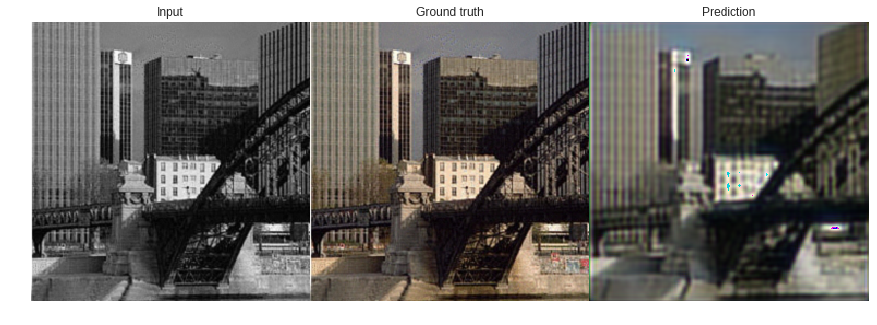

In [122]:
from keras.models import load_model

def predict_from_model(batch_size = 3):
  model = load_model('colorize-model.h5')
  img, r, g, b, gray = get_data_as_batch(batch_size)
  constant_input = np.reshape(np.asarray([255] * (batch_size * h_dim * w_dim), dtype = int), (batch_size, h_dim, w_dim ,1))
  
  predicted_res = model.predict(np.reshape(gray[0],(1, h_dim, w_dim, 1)))
  predicted_res = np.asarray(predicted_res, dtype = np.float32)
  save_prediction(img[0], np.reshape(predicted_res[0],(h_dim, w_dim)), np.reshape(predicted_res[1],(h_dim, w_dim)), np.reshape(predicted_res[2],(h_dim, w_dim)), np.reshape(gray[0],(h_dim, w_dim)), predicted_res)
  
predict_from_model()